# Ein paar tests

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tqdm
import h5py
from PIL import Image
import napari
from pathlib import Path


In [2]:
cwd = Path.cwd()
path = Path('PE-2025-01953-M_00_s0060_PM_Complete_Transmittance_Stitched_Flat_v000-Image_Probabilities.h5')
fullpath = Path.cwd().parent/f'data/{path}'


File = h5py.File(fullpath)

In [3]:
File.keys()

<KeysViewHDF5 ['exported_data']>

In [12]:
File_np = np.array(File["Image"])[:,:]
File_np.shape

(7956, 6488)

In [4]:
File_np = np.array(File["exported_data"])[:,:]
File_np.shape

(7964, 6498, 3)

In [6]:
np.max(File_np[:,:,0])

np.uint8(1)

In [ ]:
cwd = Path.cwd()
path = Path('PE-2024-01126-M_00_s0021_PM_Complete_Transmittance_Stitched_Flat_v004-Image_Probabilities.h5')
fullpath = Path.cwd().parent/f'data/{path}'
File = h5py.File(fullpath)
File_np = np.array(File["exported_data"])[:,:]
napari.add_image(File_np, name="Bild 1", blending="additive")

path = Path('PE-2024-01126-M_00_s0021_PM_Complete_Transmittance_Stitched_Flat_v004-Image_Probabilities_1.h5')
fullpath = Path.cwd().parent/f'data/{path}'
File = h5py.File(fullpath)
File_np = np.array(File["exported_data"])[:,:]
napari.add_image(File_np, name="Bild 2", blending="additive")

# create a `Viewer` and `Image` layer here
napari.imshow(File_np)

# print shape of image data

# start the event loop and show the viewer
napari.run()

In [14]:
import h5py
import numpy as np


with h5py.File(Path.cwd().parent/f'data/v004_3.h5', "w") as f:
    # IMPORTANT: dataset must be exactly 2D
    dset = f.create_dataset("data", data=File_np, dtype="float32")

    # IMPORTANT: axes attribute must be a STRING, not list
    dset.attrs["axes"] = "xy"

In [11]:
import h5py
from pathlib import Path

with h5py.File(Path.cwd().parent/f'data/v004_1.h5', "r") as f:
    print("Datasets and shapes:")
    f.visititems(lambda name, obj: print(name, getattr(obj, "shape", None)))

    print("\nAxes attribute:")
    if "data" in f:
        print("data axes =", f["data"].attrs.get("axes"))

Datasets and shapes:
data (7956, 6488)

Axes attribute:
data axes = xy


In [6]:
def rescale (image):
    max = np.max(image)
    min = np.min(image)
    return (image-min)/(max-min) * 255

resc_np = rescale(File_np)

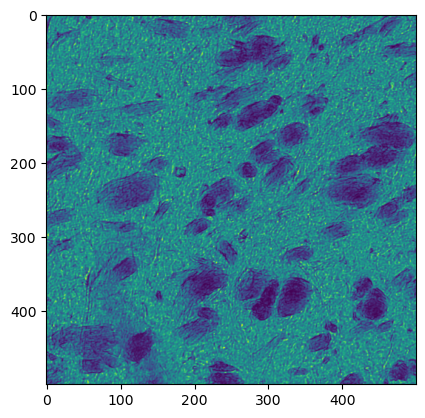

In [7]:
plt.imshow(resc_np[2000:2500, 2000:2500])

plt.savefig("test.png")

In [25]:
for i in range(10):
    img = Image.fromarray( resc_np[2000+i*100:2100+i*100, 2000+i*100:2100+i*100] )
    img.save(f'output_image_{i}.avif')
    

In [7]:
import napari

# create a `Viewer` and `Image` layer here
napari.imshow(File_np)

# print shape of image data

# start the event loop and show the viewer
napari.run()

ImportError: No Qt bindings could be found.

napari requires either PyQt5 (default), PyQt6 or PySide2 to be installed in the environment.

With pip, you can install either with:
  $ pip install -U 'napari[all]'  # default choice
  $ pip install -U 'napari[pyqt5]'
  $ pip install -U 'napari[pyqt6]'
  $ pip install -U 'napari[pyside2]'

With conda, you need to do:
  $ conda install -c conda-forge pyqt
  $ conda install -c conda-forge pyside2

Our heuristics suggest you are using 'pip' to manage your packages.

### kleiner exkurs in die statisik :DDD

In [ ]:
numbers = [1,2,3,4,5,6]
nuber = [3,3,2,4,6,6]

24

In [1]:
def fak (n):
    if n == 1:
        return 1
    return n * fak(n-1)


def n_ueber_k (n,k):
    fak(n)/(fak(k) * fak(n-k))
    return

# Image View

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tqdm
import h5py
from PIL import Image
import napari
from pathlib import Path

cwd = Path.cwd()
path = Path('PE-2024-01126-M_00_s0021_PM_Complete_Transmittance_Stitched_Flat_v004.h5')
fullpath = Path.cwd().parent/f'data/{path}'
File = h5py.File(fullpath)
img = np.array(File["Image"])


def rescale (image):
    max = np.max(image)
    min = np.min(image)
    return (image-min)/(max-min) * 255

resc_np = rescale(img)

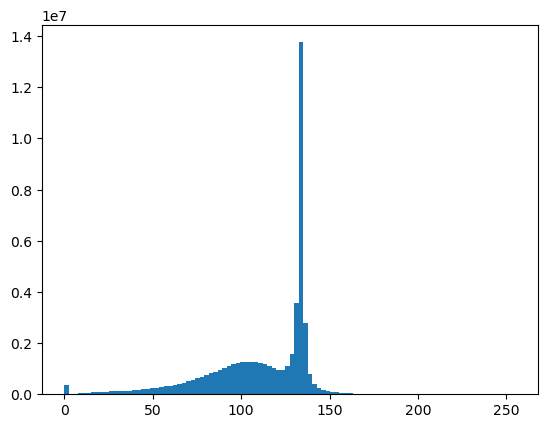

In [2]:
plt.hist(resc_np.ravel(), bins= 100)
plt.show()

In [3]:
path = Path('PE-2024-01126-M_00_s0021_PM_Complete_Transmittance_Stitched_Flat_v004.h5')

for i in range(10):
    for j in range(10):        
        img1 = Image.fromarray(resc_np[2000+i*100:2200+i*100, 2000+j*100:2200+j*100])
        fullpath1 = Path.cwd().parent/f'data/v004_s2000_100px_{i}_{j}.gif'
        img1.save(fullpath1)

# DirektML test

In [2]:
import torch
import torch.nn as nn

class DoubleConv(nn.Module):
    """Two consecutive convolutional layers with BatchNorm and ReLU"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1, features=[64, 128, 256, 512]):
        super().__init__()
        self.encoder = nn.ModuleList()
        self.decoder = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Encoder (downsampling path)
        for feature in features:
            self.encoder.append(DoubleConv(in_channels, feature))
            in_channels = feature
        
        # Bottleneck
        self.bottleneck = DoubleConv(features[-1], features[-1] * 2)
        
        # Decoder (upsampling path)
        for feature in reversed(features):
            self.decoder.append(
                nn.ConvTranspose2d(feature * 2, feature, kernel_size=2, stride=2)
            )
            self.decoder.append(DoubleConv(feature * 2, feature))
        
        # Final output layer
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)
    
    def forward(self, x):
        skip_connections = []
        
        # Encoder path
        for encoder_block in self.encoder:
            x = encoder_block(x)
            skip_connections.append(x)
            x = self.pool(x)
        
        # Bottleneck
        x = self.bottleneck(x)
        
        # Reverse skip connections for decoder
        skip_connections = skip_connections[::-1]
        
        # Decoder path
        for idx in range(0, len(self.decoder), 2):
            x = self.decoder[idx](x)  # Upsample
            skip = skip_connections[idx // 2]
            
            # Handle size mismatch if input size isn't divisible by 16
            if x.shape != skip.shape:
                x = nn.functional.interpolate(x, size=skip.shape[2:])
            
            x = torch.cat([skip, x], dim=1)  # Concatenate skip connection
            x = self.decoder[idx + 1](x)  # Double conv
        
        return self.final_conv(x)

# Example usage
# if __name__ == "__main__":
#     # Check device availability
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     print(f"Using device: {device}")
    
#     # Create model
#     model = UNet(in_channels=3, out_channels=1).to(device)
    
#     # Test with random input (batch_size=2, channels=3, height=256, width=256)
#     x = torch.randn(2, 3, 256, 256).to(device)
#     output = model(x)
    
#     print(f"Input shape: {x.shape}")
#     print(f"Output shape: {output.shape}")
#     print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

In [4]:
import torch
import torch_directml

device = torch_directml.device()  # Uses AMD GPU
model = UNet(in_channels=3, out_channels=1).to(device)
device

device(type='privateuseone', index=0)

In [7]:
torch.cuda.is_available()

False

In [8]:
import torch
import sys

print("=" * 50)
print("GPU Detection Check")
print("=" * 50)

print(f"\nPyTorch version: {torch.__version__}")
print(f"Python version: {sys.version}")

# Check CUDA/ROCm
print(f"\ntorch.cuda.is_available(): {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA/ROCm device count: {torch.cuda.device_count()}")
    print(f"Current device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
    print(f"Device capability: {torch.cuda.get_device_capability(0)}")
    
    # Memory info
    print(f"\nGPU Memory:")
    print(f"  Total: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    print(f"  Allocated: {torch.cuda.memory_allocated(0) / 1e9:.4f} GB")
    print(f"  Cached: {torch.cuda.memory_reserved(0) / 1e9:.4f} GB")
else:
    print("\nNo GPU detected via torch.cuda")

# Check DirectML (Windows)
try:
    import torch_directml
    dml_device = torch_directml.device()
    print(f"\nDirectML available: True")
    print(f"DirectML device: {dml_device}")
except ImportError:
    print("\nDirectML not installed")
except Exception as e:
    print(f"\nDirectML error: {e}")

print("\n" + "=" * 50)

GPU Detection Check

PyTorch version: 2.4.1+cpu
Python version: 3.11.14 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 18:30:03) [MSC v.1929 64 bit (AMD64)]

torch.cuda.is_available(): False

No GPU detected via torch.cuda

DirectML available: True
DirectML device: privateuseone:0



In [10]:
import torch
import torch.nn as nn
import torch_directml

# Use your AMD GPU
device = torch_directml.device()
model = UNet(in_channels=3, out_channels=1).to(device)

# Dummy data
train_data = torch.randn(10, 3, 256, 256).to(device)
train_labels = torch.randn(10, 1, 256, 256).to(device)

# Training setup
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
model.train()
for epoch in range(5):
    optimizer.zero_grad()
    outputs = model(train_data)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 1.1119
Epoch 2, Loss: 1.1279
Epoch 3, Loss: 0.9976
Epoch 4, Loss: 0.9697
Epoch 5, Loss: 0.9440


# maske erstellen

Ilastik Projekte PPM_project_2.ilp und PPM_Mask_Background.ilp öffnen und je die "s0060...h5" exportieren

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from pathlib import Path
from tqdm import tqdm
import os


def load_array_from_h5(path):
     with h5py.File(path,'r') as file:
        Key = "Image" if "Image" in file.keys() else "exported_data"
        data = file[Key][:]
        return np.array(data)

path_mask = "PE-2025-01953-M_00_s0060_PM_Complete_Transmittance_Stitched_Flat_v000-Image_Probabilities_255_8b.h5"
path_background = "PE-2025-01953-M_00_s0060_PM_Complete_Transmittance_Stitched_Flat_v000-Image_Probabilities_background.h5"
Filepath = Path.cwd()
fullpath = Path.cwd().parent/f'data/{path}'
dat_path_mask = Filepath.parent/f'data/{path_mask}'   #.parent for different location
dat_path_background = Filepath.parent/f'data/{path_background}'

img_mask = load_array_from_h5(dat_path_mask)
img_background = load_array_from_h5(dat_path_background)

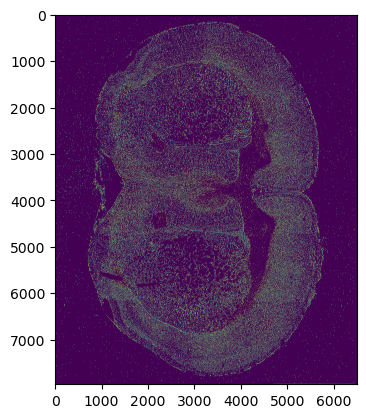

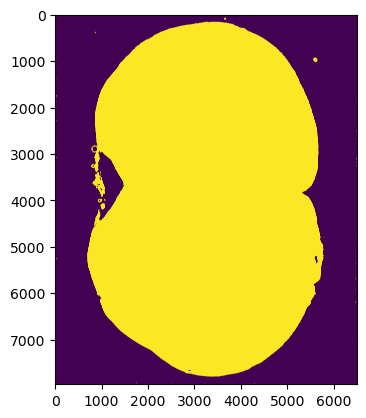

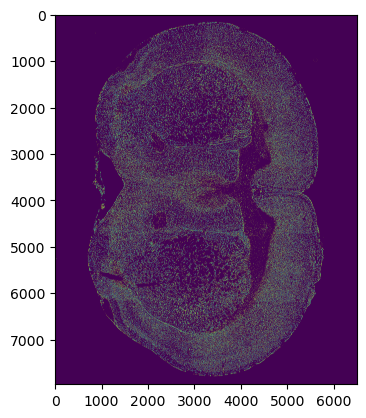

In [30]:
vessels_mask = img_mask[:,:,0]
vessels_mask[vessels_mask < 75] = 0
background_mask = (img_background[:,:,1] >= 100)
VesNoBack = vessels_mask * background_mask
plt.imshow(vessels_mask*255)
plt.show()
plt.imshow(background_mask*255)
plt.show()
plt.imshow(VesNoBack*255)
plt.show()

In [ ]:
with h5py.File(Path.cwd().parent/f'data/{path_mask.split(".h5")[0]}_background.h5', "w") as f:
    # IMPORTANT: dataset must be exactly 2D
    dset = f.create_dataset("exported_data", data=VesNoBack, dtype="int8")

Mask sanples erstellen

In [ ]:
file_path = Path.cwd().parent/f'data/{path_mask.split(".h5")[0]}_background.h5'

img = load_array_from_h5(file_path)

save_path = Path.cwd().parent/f'data/subsample_{file_path.stem}'
save_path.mkdir(parents=True, exist_ok=True)

for i in tqdm(range(0,img.shape[0],250)): # Je 500 für keinen overlap, 250 -> jeder bereich des bildes ist in 4 ausschnitten enthalten
    for j in range(0,img.shape[1],250):   # " ^ " 
        sub_img = img[i:i+500, j:j+500] 

        plt.imsave(save_path/f'{i}_{j}.png',sub_img,cmap="gray")

100%|██████████| 32/32 [00:13<00:00,  2.37it/s]


Bild samples erstellen

In [38]:
file_path = Path.cwd().parent/f'data/{path_mask.split("-Image")[0]}.h5'

img = load_array_from_h5(file_path)

save_path = Path.cwd().parent/f'data/subsample_{file_path.stem}'
save_path.mkdir(parents=True, exist_ok=True)

for i in tqdm(range(0,img.shape[0],250)): # Je 500 für keinen overlap, 250 -> jeder bereich des bildes ist in 4 ausschnitten enthalten
    for j in range(0,img.shape[1],250):   # " ^ " 
        sub_img = img[i:i+500, j:j+500] 

        plt.imsave(save_path/f'{i}_{j}.png',sub_img,cmap="gray")

100%|██████████| 32/32 [00:54<00:00,  1.70s/it]


# Unet

In [13]:
import copy
import os
import random
import shutil
import zipfile
from math import atan2, cos, sin, sqrt, pi, log
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
from numpy import linalg as LA
from torch import optim, nn
from torch.utils.data import DataLoader, random_split
from torch.utils.data.dataset import Dataset
from torchvision import transforms
from tqdm import tqdm

In [6]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv_op = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv_op(x)
    
class DownSample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = DoubleConv(in_channels, out_channels)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        down = self.conv(x)
        p = self.pool(down)

        return down, p

class UpSample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_channels, in_channels//2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        x = torch.cat([x1, x2], 1)
        return self.conv(x)
    

class UNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.down_convolution_1 = DownSample(in_channels, 64)
        self.down_convolution_2 = DownSample(64, 128)
        self.down_convolution_3 = DownSample(128, 256)
        self.down_convolution_4 = DownSample(256, 512)

        self.bottle_neck = DoubleConv(512, 1024)

        self.up_convolution_1 = UpSample(1024, 512)
        self.up_convolution_2 = UpSample(512, 256)
        self.up_convolution_3 = UpSample(256, 128)
        self.up_convolution_4 = UpSample(128, 64)

        self.out = nn.Conv2d(in_channels=64, out_channels=num_classes, kernel_size=1)

    def forward(self, x):
        down_1, p1 = self.down_convolution_1(x)
        down_2, p2 = self.down_convolution_2(p1)
        down_3, p3 = self.down_convolution_3(p2)
        down_4, p4 = self.down_convolution_4(p3)

        b = self.bottle_neck(p4)

        up_1 = self.up_convolution_1(b, down_4)
        up_2 = self.up_convolution_2(up_1, down_3)
        up_3 = self.up_convolution_3(up_2, down_2)
        up_4 = self.up_convolution_4(up_3, down_1)

        out = self.out(up_4)
        return out

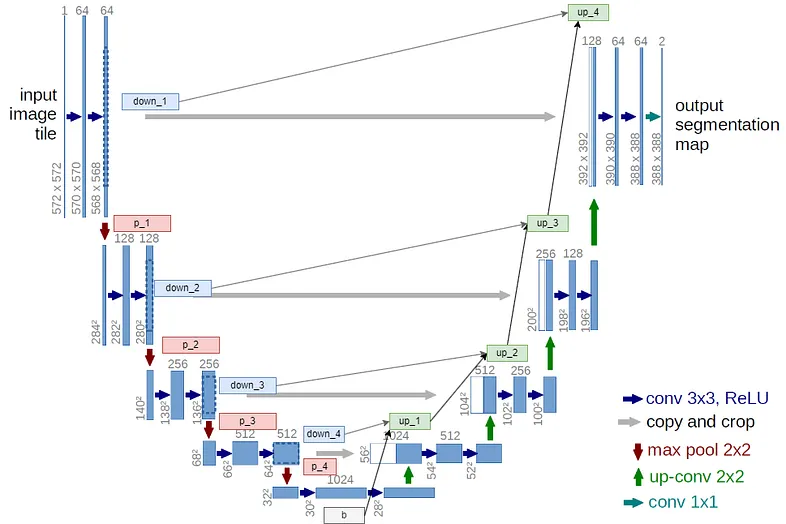

In [10]:
# Source - https://stackoverflow.com/a
# Posted by Fábio Perez, modified by community. See post 'Timeline' for change history
# Retrieved 2025-12-13, License - CC BY-SA 4.0

pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
pytorch_total_params

31032330

ein bisschen viele parameter

In [11]:
class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.images[idx])
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

def get_dataloader(image_dir, mask_dir, batch_size=4, shuffle=True):
    transform = transforms.Compose([transforms.ToTensor()])
    dataset = SegmentationDataset(image_dir, mask_dir, transform)
    return torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)


In [16]:
image_dirs = Path.cwd().parent/f'data/images/'
masks_dirs = Path.cwd().parent/f'data/masks/'
generator = torch.Generator().manual_seed(25)
train_dataset = get_dataloader(image_dirs, masks_dirs)
train_dataset, test_dataset =  random_split(train_dataset, [0.8, 0.2], generator=generator) # 80% training
test_dataset, val_dataset = random_split(test_dataset, [0.5, 0.5], generator=generator) # 10% test, 10% validation

In [39]:
import torch
import torch_directml
import os

# Device setup
try:
    device = torch_directml.device()
    device_type = "directml"
except:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    device_type = str(device)

print(f"Using device: {device_type}")

# Worker-Anzahl bestimmen
if device_type == "cuda":
    # Für NVIDIA GPUs: 4 Worker pro GPU
    num_workers = torch.cuda.device_count() * 4
elif device_type == "directml":
    # Für AMD GPUs (DirectML): Weniger Worker, da DirectML anders arbeitet
    num_workers = min(4, os.cpu_count() // 2)
else:
    # Für CPU: Anzahl CPU-Kerne - 1
    num_workers = max(1, os.cpu_count() - 1)

print(f"Using {num_workers} workers")

Using device: directml
Using 4 workers


In [40]:
num_workers = 4

In [41]:
LEARNING_RATE = 3e-4
BATCH_SIZE = 8

train_dataloader = DataLoader(dataset=train_dataset,
                              num_workers=num_workers, pin_memory=False,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset,
                            num_workers=num_workers, pin_memory=False,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                            num_workers=num_workers, pin_memory=False,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

model = UNet(in_channels=3, num_classes=1).to(device)
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

In [37]:
def dice_coefficient(prediction, target, epsilon=1e-07):
    prediction_copy = prediction.clone()

    prediction_copy[prediction_copy < 0] = 0
    prediction_copy[prediction_copy > 0] = 1

    intersection = abs(torch.sum(prediction_copy * target))
    union = abs(torch.sum(prediction_copy) + torch.sum(target))
    dice = (2. * intersection + epsilon) / (union + epsilon)
    
    return dice

In [38]:
torch.cuda.empty_cache()

In [42]:
EPOCHS = 3

train_losses = []
train_dcs = []
val_losses = []
val_dcs = []

for epoch in tqdm(range(EPOCHS)):
    model.train()
    train_running_loss = 0
    train_running_dc = 0
    
    for idx, img_mask in enumerate(tqdm(train_dataloader, position=0, leave=True)):
        img = img_mask[0].float().to(device)
        mask = img_mask[1].float().to(device)
        
        y_pred = model(img)
        optimizer.zero_grad()
        
        dc = dice_coefficient(y_pred, mask)
        loss = criterion(y_pred, mask)
        
        train_running_loss += loss.item()
        train_running_dc += dc.item()

        loss.backward()
        optimizer.step()

    train_loss = train_running_loss / (idx + 1)
    train_dc = train_running_dc / (idx + 1)
    
    train_losses.append(train_loss)
    train_dcs.append(train_dc)

    model.eval()
    val_running_loss = 0
    val_running_dc = 0
    
    with torch.no_grad():
        for idx, img_mask in enumerate(tqdm(val_dataloader, position=0, leave=True)):
            img = img_mask[0].float().to(device)
            mask = img_mask[1].float().to(device)

            y_pred = model(img)
            loss = criterion(y_pred, mask)
            dc = dice_coefficient(y_pred, mask)
            
            val_running_loss += loss.item()
            val_running_dc += dc.item()

        val_loss = val_running_loss / (idx + 1)
        val_dc = val_running_dc / (idx + 1)
    
    val_losses.append(val_loss)
    val_dcs.append(val_dc)

    print("-" * 30)
    print(f"Training Loss EPOCH {epoch + 1}: {train_loss:.4f}")
    print(f"Training DICE EPOCH {epoch + 1}: {train_dc:.4f}")
    print("\n")
    print(f"Validation Loss EPOCH {epoch + 1}: {val_loss:.4f}")
    print(f"Validation DICE EPOCH {epoch + 1}: {val_dc:.4f}")
    print("-" * 30)

# Saving the model
torch.save(model.state_dict(), 'my_checkpoint.pth')

  0%|          | 0/3 [00:05<?, ?it/s]


RuntimeError: DataLoader worker (pid(s) 12260, 7764, 16288, 10184) exited unexpectedly